## Setup

Load MNIST data and prepare a simple softmax model

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W) + b)
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Define the test function

This will allow us to check accuracy over time (the number of examples 

In [64]:
def accuracies_over_time(alpha=0.01, batch_size=lambda x: 50, num_examples=5000):
    train_step = tf.train.GradientDescentOptimizer(alpha).minimize(cross_entropy)
    accuracies = np.array([[0, 0]])
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        epoch = 0
        examples_seen = 0
        while examples_seen < num_examples:
            batch_count = batch_size(epoch)
            epoch += 1
            examples_seen += batch_count
            batch = mnist.train.next_batch(batch_count)
            train_step.run(feed_dict={x: batch[0], y_: batch[1]})
            eval_accuracy = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
            accuracies = np.append(accuracies, [[examples_seen, eval_accuracy]], axis=0)
    return accuracies

## Differrent static batch sizes

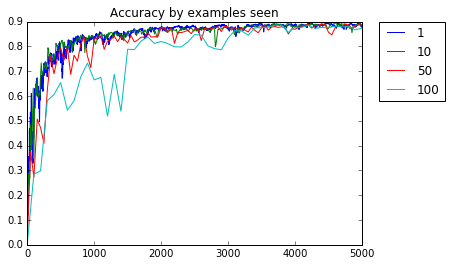

In [65]:
%matplotlib inline
# TODO: Also show accuracy per epoch, since small batch sizes get more updates.
accuracies = accuracies_over_time(batch_size=lambda x: 10)
plt.plot(accuracies[:,0], accuracies[:,1], label='10')
accuracies = accuracies_over_time(batch_size=lambda x: 50)
plt.plot(accuracies[:,0], accuracies[:,1], label='50')
accuracies = accuracies_over_time(batch_size=lambda x: 100)
plt.plot(accuracies[:,0], accuracies[:,1], label='100')
plt.title('Accuracy by examples seen')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Different static learning rates

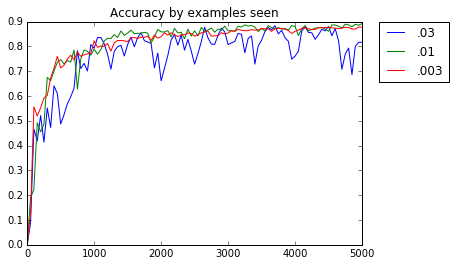

In [59]:
%matplotlib inline
accuracies = accuracies_over_time(alpha=0.03)
plt.plot(accuracies[:,0], accuracies[:,1], label='.03')
accuracies = accuracies_over_time(alpha=0.01)
plt.plot(accuracies[:,0], accuracies[:,1], label='.01')
accuracies = accuracies_over_time(alpha=0.003)
plt.plot(accuracies[:,0], accuracies[:,1], label='.003')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Accuracy by examples seen')
plt.show()